In [1]:
import networkx as nx
import pyro.distributions as dist
import matplotlib.pylab as plt
import numpy as np
import sys
sys.path.append("/home/folzd/phd/compositions_mixtures_factors")

In [2]:
from models_and_guides import *

In [3]:
factor = nx.DiGraph()

In [4]:
nodes = [
    ('X',{'distribution':dist.Normal,'node_type':'obs'}),
    ('z',{'distribution':dist.Normal,'node_type':'latent'}),
    ('W',{'distribution':dist.Normal,'node_type':'latent'}),
    ('Sigma',{'distribution':dist.LogNormal,'node_type':'latent'})
]

In [5]:
edges = [
    ('z','X'),
    ('W','X'),
    ('Sigma','X')
]

In [6]:
factor.add_nodes_from(nodes)
factor.add_edges_from(edges)

In [7]:
factor.nodes

NodeView(('X', 'z', 'W', 'Sigma'))

In [8]:
list(factor.adj['z'])

['X']

/home/folzd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/folzd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


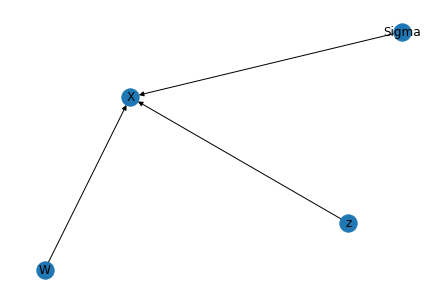

In [9]:
nx.draw(factor, with_labels=True)

In [10]:
def unroll_plate(G, nodes, plate_size, plate_name):
    for node in nodes:
        out_edges = G.out_edges(node)
        in_edges = G.in_edges(node)
        plate_nodes = [(node+'_'+str(i),{**G.nodes[node],'plate':plate_name}) for i in range(plate_size)]
        G.add_nodes_from(plate_nodes)
        new_out_edges = [(n[0],e[1]) for n in plate_nodes for e in G.out_edges(node)]
        new_in_edges = [(e[0],n[1]) for n in plate_nodes for e in G.in_edges(node)]
        G.add_edges_from(new_out_edges+new_in_edges)
        G.remove_node(node)

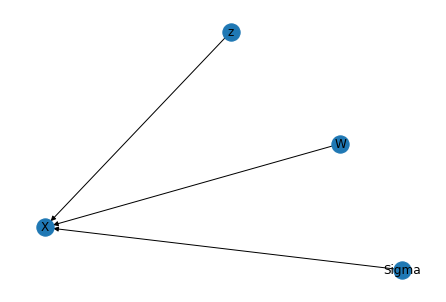

In [11]:
nx.draw(factor, with_labels=True)

In [12]:
unroll_plate(factor, ['W','z'], 8, 'K')

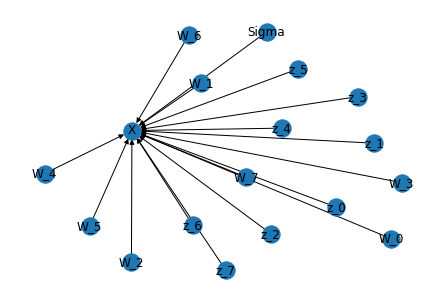

In [13]:
nx.draw(factor, with_labels=True)

In [14]:
nx.get_node_attributes(factor,'plate')

{'W_0': 'K',
 'W_1': 'K',
 'W_2': 'K',
 'W_3': 'K',
 'W_4': 'K',
 'W_5': 'K',
 'W_6': 'K',
 'W_7': 'K',
 'z_0': 'K',
 'z_1': 'K',
 'z_2': 'K',
 'z_3': 'K',
 'z_4': 'K',
 'z_5': 'K',
 'z_6': 'K',
 'z_7': 'K'}

In [15]:
mixture = nx.DiGraph()

In [16]:
nodes = [
    ('X',{'distribution':dist.Normal,'node_type':'obs'}),
    ('z',{'distribution':dist.Categorical,'node_type':'latent'}),
    ('mu',{'distribution':dist.Normal,'node_type':'latent'}),
    ('Sigma',{'distribution':dist.LogNormal,'node_type':'latent'})
]

In [17]:
edges = [
    ('z','X'),
    ('mu','X'),
    ('Sigma','X')
]

In [18]:
mixture.add_nodes_from(nodes)
mixture.add_edges_from(edges)

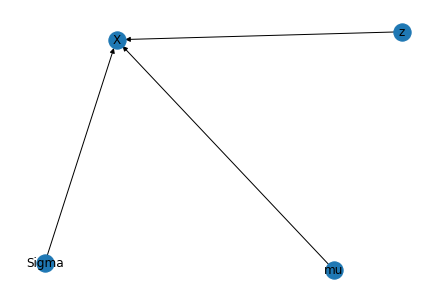

In [19]:
nx.draw(mixture, with_labels=True)

In [20]:
N = 100
D = 2
tmp = ZeroMeanFactor(np.empty((N,D)), 3, N, 't')

In [21]:
tmptrace = pyro.poutine.trace(tmp.model).get_trace(torch.empty((N,D)))

In [22]:
tmptrace.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([[ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                        [ 0.0000e+00,  0.0000e+00],
                    